

## Aplicar transformada de Fourier



Supongamos que tenemos una serie temporal que se compone de 3 ondas periódicas de las cuales conocemos perfectamente su periodo y amplitud.

In [ ]:
import numpy as np

In [ ]:
delta=0.5
t=np.arange(0,60*24,delta)
uno=0.3*np.cos((2*np.pi/8)*t-5)
dos=1*np.cos((2*np.pi/12)*t)
tres=0.5*np.cos((2*np.pi/12.5)*t)
x=uno+dos+tres

#xG=dos+tres

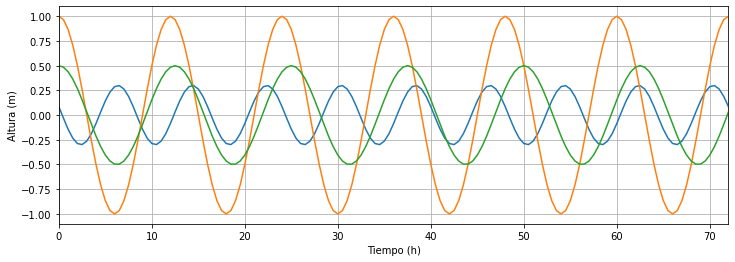

In [ ]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(t,uno,t,dos,t,tres)
axs.set(xlabel='Tiempo (h)',ylabel='Altura (m)',xlim=[0,72])
axs.grid(which='both')

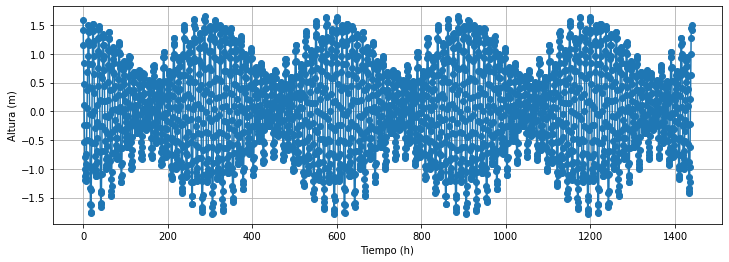

In [ ]:
#import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(t,x,'-o')
axs.set(xlabel='Tiempo (h)',ylabel='Altura (m)')
axs.grid(which='both')

In [ ]:
freq=np.fft.fftfreq(t.size,d=0.5*60*60)
freq

array([ 0.00000000e+00,  1.92901235e-07,  3.85802469e-07, ...,
       -5.78703704e-07, -3.85802469e-07, -1.92901235e-07])

In [ ]:
Y=np.fft.fft(x)
Y

array([2.05484263+0.j        , 2.05498521+0.01199678j,
       2.05541308+0.02399896j, ..., 2.05612662-0.03601195j,
       2.05541308-0.02399896j, 2.05498521-0.01199678j])

In [ ]:
xff=(1/len(Y))*np.abs(Y)*2 #--> Calculo la magnitud calculando la norma de los coeficientes obtenidos
xff

array([0.00142697, 0.0014271 , 0.00142747, ..., 0.00142808, 0.00142747,
       0.0014271 ])

In [ ]:
freq[freq>=0] #--> si quiero tomar solo las positivas

array([0.00000000e+00, 1.92901235e-07, 3.85802469e-07, ...,
       2.77199074e-04, 2.77391975e-04, 2.77584877e-04])

In [ ]:
h=round(len(freq)/2)
h

1440

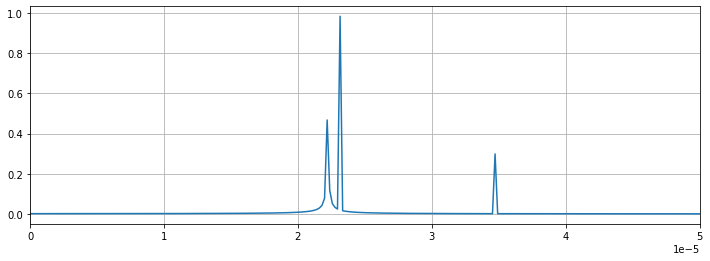

In [ ]:
fig,axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq[0:h],xff[0:h])
axs.set(xlim=[0,0.00005])
axs.grid(which='both')

In [ ]:
import pandas as pd

In [ ]:
fase=np.angle(Y)
fase

array([ 0.        ,  0.00583783,  0.01167545, ..., -0.01751267,
       -0.01167545, -0.00583783])

In [ ]:
resultados=pd.DataFrame(columns=['f','xff'])
resultados

,f,xff


In [ ]:
resultados['f']=freq[0:h]
resultados['xff']=np.round(xff[0:h],1)
resultados['T']=(1/resultados['f'])/3600
resultados['T']=resultados['T'].round(1)
resultados['fase']=fase[0:h]

In [ ]:
resultados.sort_values(by=['xff'],ascending=False)

,f,xff,T,fase
120,0.000023,1.0,12.0,-0.011865
115,0.000022,0.5,12.5,0.627359
180,0.000035,0.3,8.0,1.284773
114,0.000022,0.1,12.6,0.622555
116,0.000022,0.1,12.4,-2.509443
...,...,...,...,...
482,0.000093,0.0,3.0,-1.422081
481,0.000093,0.0,3.0,-1.424034
480,0.000093,0.0,3.0,-1.425989
479,0.000092,0.0,3.0,-1.427947


## Ushuaia

In [ ]:
import pandas as pd
import xarray as xr
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/ushu_ene_2017.nc
ushuaia =xr.open_dataset(r'ushu_ene_2017.nc')
ushu=ushuaia.sea_level.to_dataframe()
ushu.set_index(ushuaia.time.values,inplace=True)
ushu.index=ushu.index.round('H')

--2022-09-18 23:57:54--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/ushu_ene_2017.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23341 (23K) [application/octet-stream]
Saving to: ‘ushu_ene_2017.nc’

ushu_ene_2017.nc    100%[===================>]  22.79K  --.-KB/s    in 0s      

2022-09-18 23:57:54 (78.9 MB/s) - ‘ushu_ene_2017.nc’ saved [23341/23341]



In [ ]:
ushu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2017-01-01 00:00:00 to 2017-01-31 23:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sea_level  744 non-null    float32
dtypes: float32(1)
memory usage: 8.7 KB


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
ushu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2017-01-01 00:00:00 to 2017-01-31 23:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sea_level  744 non-null    float32
dtypes: float32(1)
memory usage: 8.7 KB


De acuerdo a que quiero utilizar la función de Numpy, paso la información de nivel a un array

In [ ]:
x_ushu=np.squeeze(ushu.values-ushu.mean().values)
x_ushu=x_ushu/1000
np.info(x_ushu)

class:  ndarray
shape:  (744,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x4c90400
byteorder:  little
byteswap:  False
type: float32


Calculo el espacio de frecuencias de acuerdo a la resolución/duración temporal de nuestra serie

In [ ]:
fs_ushu=1/(60*60)
dur_ushu=ushu.size*60*60
ff_ushu=1/(dur_ushu-1)
fN_ushu=1/(2*60*60)
f_ushu=np.arange(0,fN_ushu,ff_ushu)

Eso podría haberse hecho con una función

In [ ]:
freq_ushu=np.fft.fftfreq(x_ushu.size,d=60*60)


Calculo la transformada de Fourier

In [ ]:
Y_ushu=np.fft.fft(x_ushu)
faseu=np.angle(Y_ushu)

In [ ]:
xff_ushu=(1/len(Y_ushu))*np.abs(Y_ushu)#Y_ushu.real

In [ ]:
xff_ushu.size

744

In [ ]:
freq_ushu.size

744

Graficamos lo obtenido

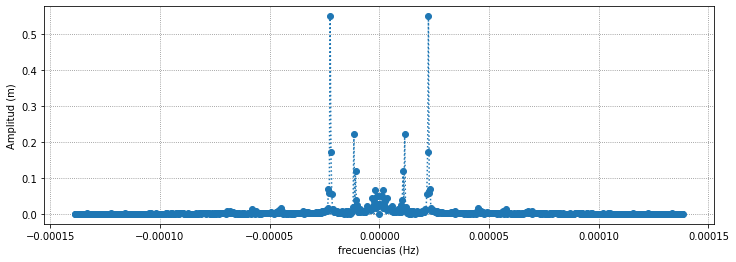

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_ushu,xff_ushu*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='frecuencias (Hz)')
axs.grid(color='grey',ls=':',which='both')

Hago un grafico como para ir viendo como queda

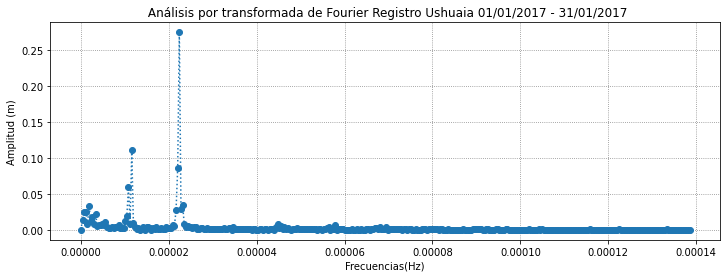

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(freq_ushu[freq_ushu>=0],xff_ushu[freq_ushu>=0],':o')
axs.set(ylabel='Amplitud (m)',xlabel='Frecuencias(Hz)',title=" Análisis por transformada de Fourier Registro Ushuaia 01/01/2017 - 31/01/2017")
axs.grid(color='grey',ls=':',which='both')

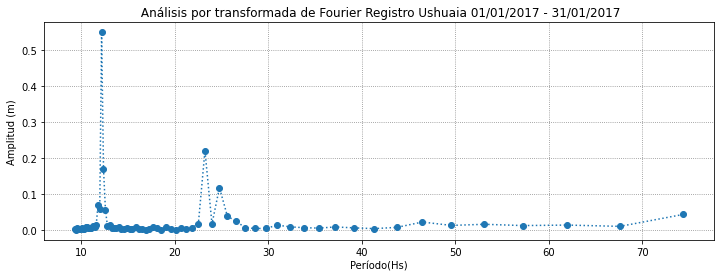

In [ ]:
per_ushu=(1/freq_ushu[1::])/3600
per_ushu=np.append(per_ushu,0)
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(per_ushu[9:80],xff_ushu[9:80]*2,':o')
axs.set(ylabel='Amplitud (m)',xlabel='Período(Hs)',title=" Análisis por transformada de Fourier Registro Ushuaia 01/01/2017 - 31/01/2017")
axs.grid(color='grey',ls=':',which='both')

In [ ]:
resul_ushu=pd.DataFrame(columns=['f','T','A','fase'])
resul_ushu['f']=freq_ushu[freq_ushu>=0]
resul_ushu['T']=(1/freq_ushu[freq_ushu>=0])/3600
resul_ushu['A']=2*xff_ushu[freq_ushu>=0]
resul_ushu['fase']=faseu[freq_ushu>=0]
ordenadosu=resul_ushu.sort_values(by=['A'],ascending=False)
ordenadosu['A']=ordenadosu['A'].round(3)
ordenadosu = ordenadosu.reset_index(drop=True)
print(ordenadosu[0:10])

              f           T      A      fase
0  2.240143e-05   12.400000  0.550  0.552976
1  1.157407e-05   24.000000  0.221 -1.702863
2  2.202808e-05   12.610169  0.171  3.012025
3  1.082736e-05   25.655172  0.118 -2.890977
4  2.314815e-05   12.000000  0.070  1.413662
5  1.866786e-06  148.800000  0.066 -2.849118
6  2.277479e-05   12.196721  0.058  1.040498
7  2.165472e-05   12.827586  0.055 -1.038600
8  1.120072e-06  248.000000  0.051  1.613904
9  7.467145e-07  372.000000  0.051  1.190846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
t=np.arange(0,len(ushu))
np.squeeze(t)
w=2*np.pi/ordenadosu['T']
########
#Como estaba escrito en clase
####
ondis=[ordenadosu['A'][i]*np.cos(w[i]*t+ordenadosu['fase'][i]) for i in range(1)]
ondas=pd.DataFrame(np.array(ondis).T)
ondas=ondas.set_index(ushu.index)
ushu.sea_level=(ushu.sea_level-np.mean(ushu.sea_level))
#ondiws = []

#for i in range (10):
# ondiwisi = [ordenadosu['A'][i]*np.cos(w[i]*t+ordenadosu['fase'][i])]
# ondiws.append(ondiwisi)
#ondiws.append(ondiwisi) #---> acá falta un tab

#for i in range(10):
  #ondiws=[ordenadosu['A'][i]*np.cos(w[i]*t-ordenadosu['fase'][i])]
#ondas=pd.DataFrame(np.array(ondiwisi).T)
#ondas=ondas.set_index(ushu.index)
#ushu.sea_level=(ushu.sea_level-np.mean(ushu.sea_level))



#ondiws = []
#for i in range (10):
# ondiwisi = [ordenadosu['A'][i]*np.cos(w[i]*t-ordenadosu['fase'][i])]
#ondiws.append(ondiwisi)

In [ ]:
ondas

,0
2017-01-01 00:00:00,0.468031
2017-01-01 01:00:00,0.269031
2017-01-01 02:00:00,0.002422
2017-01-01 03:00:00,-0.264796
2017-01-01 04:00:00,-0.465469
...,...
2017-01-31 19:00:00,-0.219119
2017-01-31 20:00:00,0.053233
2017-01-31 21:00:00,0.312207
2017-01-31 22:00:00,0.492721


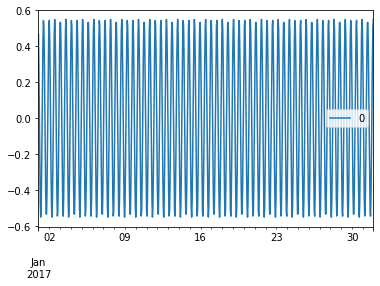

In [ ]:
ondas.plot()

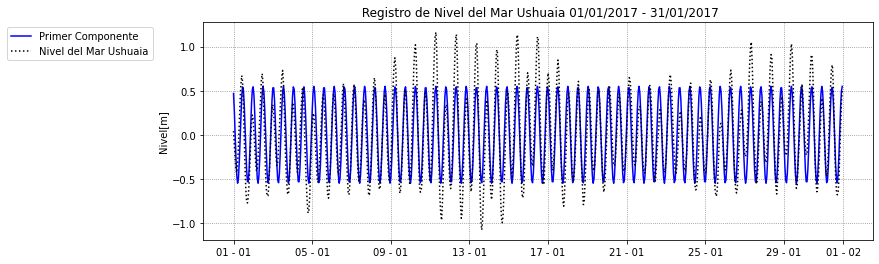

In [ ]:
fig, ax=plt.subplots(1,1, figsize=(12,4))
ax.plot(ondas.index,ondas.sum(axis=1),'b',ushu.index,ushu.sea_level/1000,':k')
ax.set(ylabel="Nivel[m]",title=" Registro de Nivel del Mar Ushuaia 01/01/2017 - 31/01/2017")
#ax.xaxis.set_minor_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d - %m'))
ax.grid(color='grey' , linestyle=':' , which='both')
ax.legend(['Primer Componente','Nivel del Mar Ushuaia'],bbox_to_anchor=[-.30, 1], loc='upper left')

## MdP



In [ ]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/MdP_may12_ene13.csv
mardel =pd.read_csv(r'MdP_may12_ene13.csv',header=None,names=['Niveles'])

--2022-09-18 23:57:56--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/MdP_may12_ene13.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494899 (483K) [text/plain]
Saving to: ‘MdP_may12_ene13.csv’

MdP_may12_ene13.csv 100%[===================>] 483.30K  --.-KB/s    in 0.03s   

2022-09-18 23:57:56 (18.0 MB/s) - ‘MdP_may12_ene13.csv’ saved [494899/494899]



In [ ]:
mardel.head()
fechmdp=pd.date_range('2012-05-31 11:50:00',periods=len(mardel),freq='5 min')
mardel.set_index(fechmdp,inplace=True)

In [ ]:
mardel.size

61815

In [ ]:
frq_mdp=np.fft.fftfreq(mardel.size,d=5*60)

In [ ]:
mardel.mean()

Niveles    0.975499
dtype: float64

In [ ]:
datos=mardel.values-mardel.mean().values
#datos
np.squeeze(datos)

array([-0.32849905, -0.32849905, -0.32949905, ...,  0.81350095,
        0.79450095,  0.75550095])

In [ ]:
Y_mardel=np.fft.fft(np.squeeze(datos)) #Notar que tuve que modificar el formato de mis datos ara que np.fft se los coma
Y_mardel

array([1.03472786e-12-3.33066907e-15j, 4.33522068e+03+9.84044747e+02j,
       5.17784715e+02-2.22930466e+02j, ...,
       7.33746149e+02-4.79621331e+02j, 5.17784715e+02+2.22930466e+02j,
       4.33522068e+03-9.84044747e+02j])

In [ ]:
xff_mardel=(1/len(Y_mardel))*np.abs(Y_mardel)*2#
fase=np.angle(Y_mardel)

In [ ]:
resul_mardel=pd.DataFrame(columns=['f','T','A','fase'])

In [ ]:
resul_mardel['f']=frq_mdp[frq_mdp>=0]
resul_mardel['T']=(1/frq_mdp[frq_mdp>=0])/3600
resul_mardel['A']=xff_mardel[frq_mdp>=0]
resul_mardel['fase']=fase[frq_mdp>=0]
ordenadosm=resul_mardel.sort_values(by=['A'],ascending=False)
ordenadosm['A']=ordenadosm['A'].round(3)
ordenadosm = ordenadosm.reset_index(drop=True)
print(ordenadosm[0:10])
t1=np.arange(0,len(mardel))
np.squeeze(t1)
w2=2*np.pi/ordenadosm['T']
ondis2=[ordenadosm['A'][i]*np.cos(w2[i]*t1+ordenadosm['fase'][i]) for i in range(1)]
ondas2=pd.DataFrame(np.array(ondis2).T)
ondas2=ondas2.set_index(mardel.index)
mardel.Niveles=(mardel.Niveles-np.mean(mardel.Niveles))



#ondis=[ordenadosu['A'][i]*np.cos(w[i]*t+ordenadosu['fase'][i]) for i in range(1)]
#ondas=pd.DataFrame(np.array(ondis).T)
#ondas=ondas.set_index(ushu.index)
#ushu.sea_level=(ushu.sea_level-np.mean(ushu.sea_level))

              f            T      A      fase
0  2.237860e-05    12.412651  0.311  1.768607
1  5.392434e-08  5151.250000  0.144  0.223206
2  1.159373e-05    23.959302  0.141 -2.630639
3  2.232468e-05    12.442633  0.122 -1.378492
4  1.073094e-05    25.885678  0.113  2.074936
5  2.194721e-05    12.656634  0.098 -2.541202
6  1.078487e-05    25.756250  0.094 -0.999815
7  1.617730e-06   171.708333  0.085 -0.211475
8  7.549408e-07   367.946429  0.074  3.047959
9  2.857990e-06    97.193396  0.071  1.496509


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
ondas2

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2012-05-31 11:50:00,-0.061119,0.140428,-0.122991,0.023317,-0.054585,-0.080861,0.050803,0.083106,-0.073676,0.005270,...,0.000985,0.000778,-0.000977,0.000380,-0.000397,-0.000885,-0.000846,0.000997,-0.000986,0.000234
2012-05-31 11:55:00,-0.201302,0.140389,-0.100911,0.078340,-0.076766,-0.044730,0.068402,0.083703,-0.073783,0.000685,...,0.000329,0.000451,-0.000905,-0.000998,-0.000756,-0.000995,-0.000139,-0.000352,-0.000851,0.000868
2012-05-31 12:00:00,-0.290998,0.140350,-0.071931,0.113808,-0.094446,0.002201,0.081950,0.084189,-0.073869,-0.003903,...,-0.000667,-0.000967,-0.000458,0.000270,0.000851,-0.000962,0.000960,-0.000703,-0.000292,-0.000719
2012-05-31 12:05:00,-0.307710,0.140310,-0.038032,0.120866,-0.106589,0.048600,0.090645,0.084561,-0.073933,-0.008475,...,-0.000975,-0.000045,0.000178,0.000822,0.000245,-0.000791,-0.000650,0.000940,0.000413,-0.000467
2012-05-31 12:10:00,-0.247246,0.140271,-0.001532,0.097754,-0.112482,0.083266,0.093973,0.084820,-0.073976,-0.013011,...,-0.000278,0.000986,0.000741,-0.000806,-0.000998,-0.000507,-0.000426,-0.000085,0.000912,0.000980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01 02:40:00,0.224919,0.140620,-0.098209,-0.088282,0.073615,0.029988,-0.056795,0.078473,-0.072817,0.027486,...,0.000426,-0.000987,0.000940,-0.000461,0.000438,0.000728,0.000445,-0.000789,0.000803,-0.000381
2013-01-01 02:45:00,0.300852,0.140582,-0.121080,-0.118000,0.050851,-0.018070,-0.037021,0.079616,-0.073032,0.023200,...,-0.000585,0.000047,0.000953,0.000989,0.000726,0.000421,0.000634,-0.000228,0.000996,-0.000781
2013-01-01 02:50:00,0.301329,0.140543,-0.135672,-0.118262,0.025106,-0.061765,-0.015056,0.080651,-0.073225,0.018817,...,-0.000993,0.000967,0.000572,-0.000184,-0.000874,0.000054,-0.000966,0.000980,0.000692,0.000817
2013-01-01 02:55:00,0.226232,0.140505,-0.140987,-0.089003,-0.002111,-0.090548,0.007801,0.081579,-0.073397,0.014355,...,-0.000378,-0.000453,-0.000046,-0.000869,-0.000201,-0.000320,0.000160,-0.000593,0.000043,0.000325


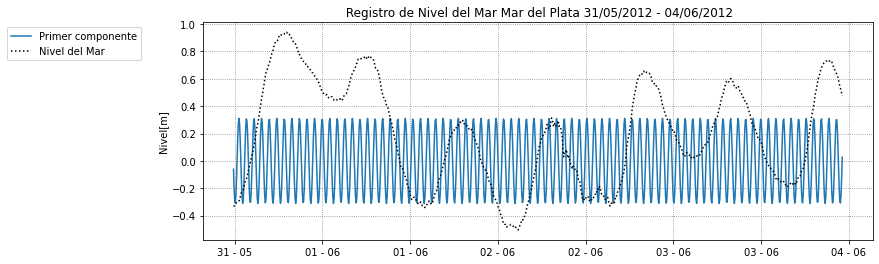

In [ ]:
fig, ax=plt.subplots(1,1, figsize=(12,4))
ax.plot(ondas2.index[0:1000],ondas2.sum(axis=1)[0:1000],mardel.index[0:1000],mardel.Niveles[0:1000],':k')
ax.set(ylabel="Nivel[m]",title=" Registro de Nivel del Mar Mar del Plata 31/05/2012 - 04/06/2012")
#ax.xaxis.set_minor_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d - %m'))
ax.grid(color='grey' , linestyle=':' , which='both')
ax.legend(['Primer componente','Nivel del Mar'],bbox_to_anchor=[-.30, 1], loc='upper left')

In [ ]:
ordenados=resul_mardel.sort_values(by=['A'],ascending=False)

In [ ]:
ordenados['A']=ordenados['A'].round(3)

In [ ]:
171/24

7.125

In [ ]:
ordenados[0:10]

,f,T,A,fase
415,2.237860e-05,12.412651,0.311,1.768607
1,5.392434e-08,5151.250000,0.144,0.223206
215,1.159373e-05,23.959302,0.141,-2.630639
414,2.232468e-05,12.442633,0.122,-1.378492
199,1.073094e-05,25.885678,0.113,2.074936
407,2.194721e-05,12.656634,0.098,-2.541202
200,1.078487e-05,25.756250,0.094,-0.999815
30,1.617730e-06,171.708333,0.085,-0.211475
14,7.549408e-07,367.946429,0.074,3.047959
53,2.857990e-06,97.193396,0.071,1.496509


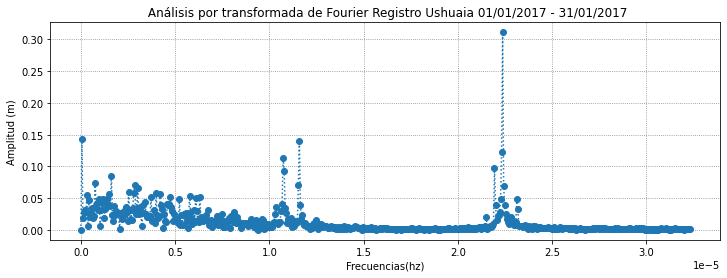

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(frq_mdp[0:600],xff_mardel[0:600],':o')
#axs.plot(frq_mdp[frq_mdp>=0],xff_mardel[frq_mdp>=0],':o')
axs.set(ylabel='Amplitud (m)',xlabel='Frecuencias(hz)',title=" Análisis por transformada de Fourier Registro Ushuaia 01/01/2017 - 31/01/2017")
axs.grid(color='grey',ls=':',which='both')

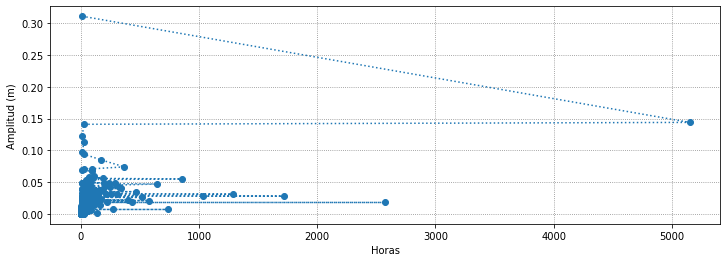

In [ ]:
per_mardel=(1/frq_mdp[1::])/3600
per_mardel=np.append(per_mardel,0)

fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(ordenados['T'][0:30908],ordenados['A'][0:30908],':o')
#axs.plot(per_mardel[5:50],xff_mardel[5:50],':o')
axs.set(ylabel='Amplitud (m)',xlabel='Horas')
axs.grid(color='grey',ls=':',which='both')